Summary: The most important feature of the surrogate decision tree, trained on the multiclass difference classifier, is LSTAT. Difference class $(0,1)$ is predicted above 9.478, $(1,2)$ is predicted between 6.065 and 6.255 and $(2,1)$ is predicted below 9.478.

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from datetime import datetime
import pickle
from comparers import ModelComparer
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier, plot_tree
from baseline import get_rules, dt_feature_importance
task_name = 't3'

In [2]:
with open(task_name + '.comparer', 'rb') as f:
    comparer = pickle.load(f)

In [3]:
X = pd.read_csv('test_data.csv')
y = X['price']
X = X.drop(columns=['Unnamed: 0', 'price'])
feature_names = X.columns.to_numpy()
class_names = y.unique().astype(str)
X.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,2.720010,12.841063,11.718208,0.572581,6.511388,1.304878,3.501706,9.346908,403.132604,18.125578,11.736981
std,6.388147,25.552540,7.290396,0.125307,0.889747,0.813494,2.007156,8.493772,165.416533,2.524334,7.372550
min,0.009060,0.000000,1.210000,0.389000,3.561000,0.000000,1.137912,1.000000,188.000000,13.000000,1.763949
25%,0.099321,0.000000,4.243588,0.462112,5.882000,1.000000,1.967365,4.000000,273.000000,15.707491,5.008267
50%,0.540032,0.000000,9.900000,0.544000,6.315500,2.000000,2.866600,5.000000,362.186013,18.571912,9.950000
75%,3.181873,20.000000,18.100000,0.638740,7.134552,2.000000,4.621654,8.000000,461.000000,20.200000,17.091674
max,73.534100,100.000000,25.650000,0.871000,8.638029,2.000000,10.710300,24.000000,679.526743,22.000000,36.980000


In [4]:
X['AGE'].value_counts()

2.0    130
1.0     61
0.0     55
Name: AGE, dtype: int64

In [5]:
is_pred_diff = comparer.predict_bin_diff(X)
mclass_diff = comparer.predict_mclass_diff(X)

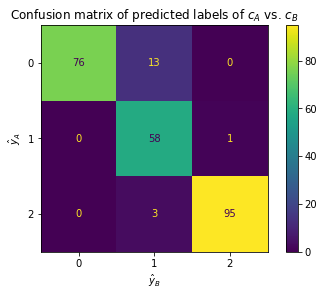

In [6]:
comparer.plot_confusion_matrix(X)

In [30]:
mclass_tree = DecisionTreeClassifier(max_depth=5)
mclass_tree.fit(X, mclass_diff)
class_names = comparer.class_names[mclass_tree.classes_]

In [31]:
feature_importances = dt_feature_importance(mclass_tree)
feature_order = np.flip(np.argsort(feature_importances))

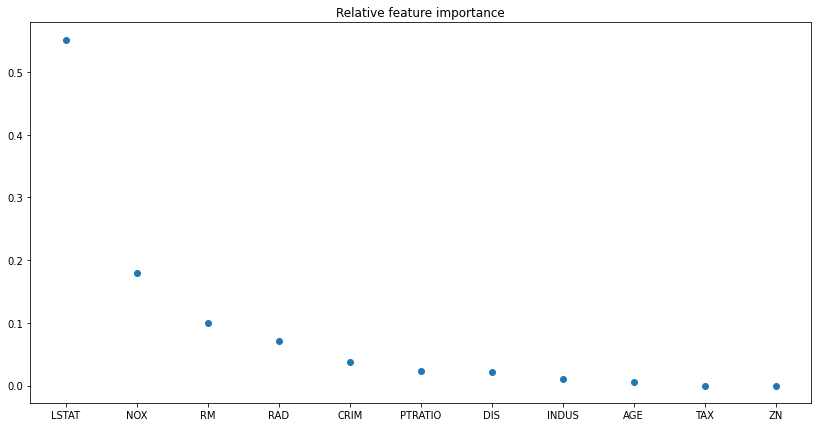

In [32]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.set_title('Relative feature importance')
ax.scatter(comparer.feature_names[feature_order], feature_importances[feature_order])
plt.show()

Class $(0,1)$ is predicted for LSTAT > 9.478.

In [33]:
rules = get_rules(mclass_tree, comparer.feature_names, class_names, '(0, 1)', feature_order)
for rule in rules:
    print(rule)

if (LSTAT > 16.715) and (LSTAT <= 17.515) and (NOX <= 0.591) and (DIS > 2.271) then class: (0, 1) (proba: 66.67%) | based on 3 samples
if (LSTAT > 17.515) and (LSTAT <= 19.53) and (NOX <= 0.591) and (PTRATIO > 20.6) then class: (0, 1) (proba: 100.0%) | based on 2 samples
if (LSTAT > 9.478) and (LSTAT <= 12.607) and (NOX > 0.591) and (INDUS > 18.84) then class: (0, 1) (proba: 100.0%) | based on 3 samples
if (LSTAT > 12.607) and (LSTAT <= 17.723) and (NOX > 0.591) and (CRIM <= 0.984) then class: (0, 1) (proba: 80.0%) | based on 5 samples


In [34]:
rules = get_rules(mclass_tree, comparer.feature_names, class_names, '(1, 0)', feature_order)
for rule in rules:
    print(rule)

Class $(1,2)$ is predicted for LSTAT between 6.065 and 6.255.

In [35]:
rules = get_rules(mclass_tree, comparer.feature_names, class_names, '(1, 2)', feature_order)
for rule in rules:
    print(rule)

if (LSTAT > 6.065) and (LSTAT <= 6.255) and (RM <= 6.62) and (RAD <= 6.0) then class: (1, 2) (proba: 100.0%) | based on 1 samples


Class $(2,1)$ is predicted for LSTAT < 9.478.

In [36]:
rules = get_rules(mclass_tree, comparer.feature_names, class_names, '(2, 1)', feature_order)
for rule in rules:
    print(rule)

if (LSTAT <= 9.478) and (NOX <= 0.744) and (RM <= 6.62) and (RAD > 6.0) and (CRIM <= 5.023) then class: (2, 1) (proba: 100.0%) | based on 2 samples
if (LSTAT <= 9.478) and (RM > 6.62) and (PTRATIO > 20.6) then class: (2, 1) (proba: 100.0%) | based on 1 samples


In [22]:
#fig, ax = plt.subplots(figsize=(42, 28))
#plot_tree(mclass_tree, feature_names=comparer.feature_names, class_names=comparer.class_names, ax=ax);